<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2020/%EA%B9%80%EB%82%98%EC%97%B0/%5BDIP%5D%EA%B3%BC%EC%A0%9C_Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram Equalization in RGB image
----------------------------

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 00. Load the RGB Image



In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
base_path = "/content/drive/My Drive/2020DIP/datasets"
img_path = "rgb_retriever.jpg"

In [4]:
org_img_path = os.path.join(base_path, img_path)

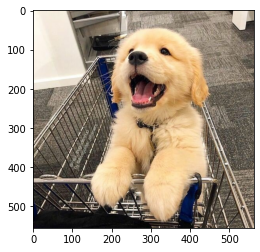

In [22]:
org_img = cv2.imread(org_img_path, cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB) # BGR --> RGB
plt.imshow(rgb_img)

In [23]:
org_img.shape

(555, 563, 3)

## 01. Histogram Equalization (1)
* ### 각 channel 별로 Histogram Equalization한 후 하나로 합치기
> #### *Warning*  
> 이 방법은 색상 변화가 발생하므로 RGB image Histrogram Equalization으로 사용하기에 적합하지 못하다. 왜냐하면 RGB image는 3개 채널의 색 조합을 통해 발현되는데 채널 각각을 HE하게되면 새로운 색조합이 생성되기 때문이다. **image의 밝기 정보만을 이용해야 한다** 

In [24]:
# 각 채녈 분리
R, G, B = cv2.split(rgb_img)
# 분리한 채널 각각 HE
R_he = cv2.equalizeHist(R)
G_he = cv2.equalizeHist(G)
B_he = cv2.equalizeHist(B)

# 각각 HE한 채널 병합
total_he = cv2.merge([R_he, G_he, B_he])

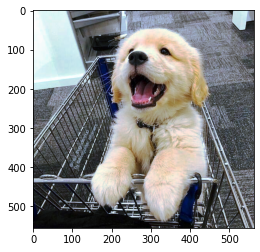

In [25]:
plt.imshow(total_he)

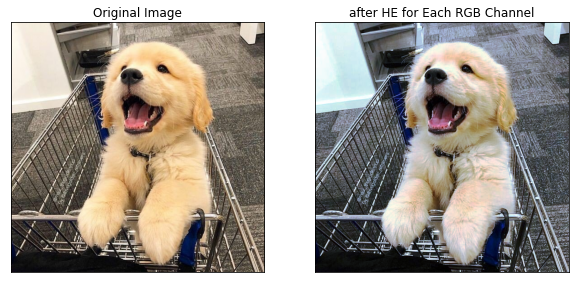

In [32]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.imshow(rgb_img)

plt.subplot(1, 2, 2)
plt.title("after HE for Each RGB Channel")
plt.xticks([])
plt.yticks([])
plt.imshow(total_he)

## 02. Histogram Equalization (2)
* ### 위의 방법에서 색조합이 변화하는 것을 방지하기 위해 image의 밝기 정보만을 이용해야 한다. 따라서 명도값과 색 정보가 따로 존재하는 color space를 사용  
> 1. HSV color space로 변환 후 명도값을 가지고 있는 **V**를 HE한 후 병합 
> 2. YCrCb color space로 변환 후 Luminance 성분인 **Y**를 HE한 후 병합

### 02-1. Using HSV color space

In [28]:
hsv_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv_img)
V_he = cv2.equalizeHist(V)

hsv_he = cv2.merge([H, S, V_he])
hsv_he = cv2.cvtColor(hsv_he, cv2.COLOR_HSV2RGB)

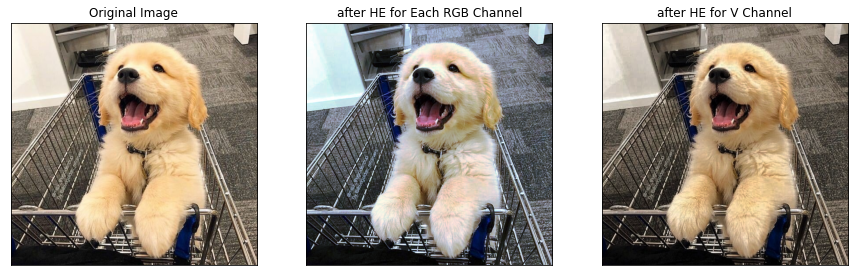

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.imshow(rgb_img)

plt.subplot(1, 3, 2)
plt.title("after HE for Each RGB Channel")
plt.xticks([])
plt.yticks([])
plt.imshow(total_he)

plt.subplot(1, 3, 3)
plt.title("after HE for V Channel")
plt.xticks([])
plt.yticks([])
plt.imshow(hsv_he)

### 02-2. Using YCrCb color space 

In [31]:
YCrCb_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(YCrCb_img)
Y_he = cv2.equalizeHist(Y)

YCrCb_he = cv2.merge([Y_he, Cr, Cb])
YCrCb_he = cv2.cvtColor(YCrCb_he, cv2.COLOR_YCrCb2RGB)

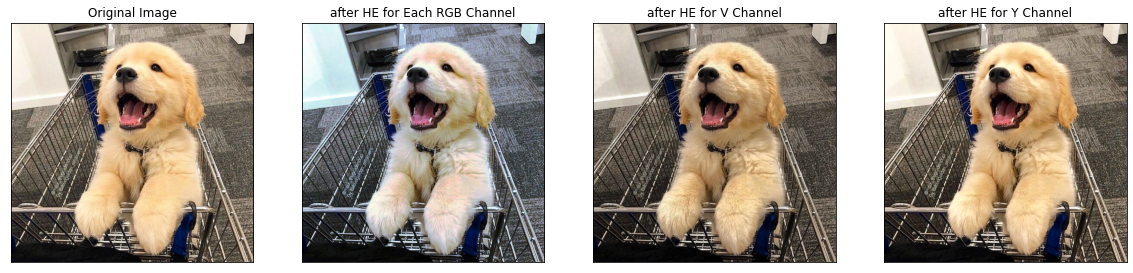

In [34]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.imshow(rgb_img)

plt.subplot(1, 4, 2)
plt.title("after HE for Each RGB Channel")
plt.xticks([])
plt.yticks([])
plt.imshow(total_he)

plt.subplot(1, 4, 3)
plt.title("after HE for V Channel")
plt.xticks([])
plt.yticks([])
plt.imshow(hsv_he)

plt.subplot(1, 4, 4)
plt.title("after HE for Y Channel")
plt.xticks([])
plt.yticks([])
plt.imshow(YCrCb_he)